## Project : Comprehensive Data Engineering and Predictive Modeling of Airbnb Listings Using Machine Learning Algorithms

__Project Description:__
    This project focuses on developing a comprehensive data pipeline to analyze and predict Airbnb rental prices. By leveraging data engineering techniques, the project encompasses data cleaning, preprocessing, feature engineering, and predictive modeling. Various machine learning algorithms, including Decision Trees, Naive Bayes, and AdaBoost, are applied to build robust models for price prediction.

__Analysis Overview__

__1.Data Cleaning and Preprocessing:__

Handle missing data and outliers.
Normalize and standardize features.
Transform categorical data into numerical formats.

__2.Feature Engineering:-__

Extract relevant features from raw data.
Create new features that capture important aspects of Airbnb listings (e.g., amenities, location, host attributes).

__3.Exploratory Data Analysis (EDA):__

Visualize distributions and relationships between features.
Identify patterns and correlations within the data.

__4.Predictive Modeling:__

Train and evaluate various machine learning models (Decision Trees, Naive Bayes, AdaBoost).
Compare model performances using metrics such as accuracy, RMSE, and MAE.
Fine-tune model hyperparameters to optimize performance.

__5.Deployment and Insights:__

Deploy the best-performing model for real-time predictions.
Generate insights on the key factors influencing Airbnb prices.
Provide actionable recommendations for hosts to optimize their listing prices.

>> #### Step 1: Cleaning and Preparing Airbnb Data


In [3]:
# Step 1: Cleaning and Preparing Airbnb Data

import pandas as pd

# Replace 'file_path.csv' with the path to your downloaded Airbnb dataset
file_path = r'listings.csv'

# Import Airbnb data into a pandas DataFrame
airbnb_data = pd.read_csv(file_path)
print("Number of rows in airbnb_data: ", len(airbnb_data))

# Display the first few rows of the DataFrame
pd.set_option('display.max_columns', len(airbnb_data.columns))
airbnb_data.head(3)

# Select relevant columns
relevant_columns = ['latitude', 'longitude', 'room_type', 'accommodates', 'beds', 'price', 'review_scores_rating']

# Keep only the selected columns
airbnb_data_cleaned = airbnb_data[relevant_columns]

# Remove missing values
airbnb_data_cleaned = airbnb_data_cleaned.dropna()

# Check if 'price' column is string type, convert to float
if airbnb_data_cleaned['price'].dtype == 'object':
    airbnb_data_cleaned['price'] = airbnb_data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

# Print the first few rows of the cleaned dataset
print(airbnb_data_cleaned.head())


<>:27: SyntaxWarning: invalid escape sequence '\$'
<>:27: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Adhitya\AppData\Local\Temp\ipykernel_28588\2998507734.py:27: SyntaxWarning: invalid escape sequence '\$'
  airbnb_data_cleaned['price'] = airbnb_data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)


Number of rows in airbnb_data:  24652
    latitude   longitude        room_type  accommodates  beds  price  \
0 -37.766060  144.979510     Private room             2   1.0   49.0   
1 -37.859990  144.976620  Entire home/apt             2   1.0   95.0   
2 -38.057230  145.339820  Entire home/apt             5   3.0  118.0   
4 -37.899830  145.115790  Entire home/apt             2   1.0  117.0   
5 -37.831557  144.970644     Private room             2   1.0   92.0   

   review_scores_rating  
0                  4.50  
1                  4.68  
2                  4.86  
4                  4.88  
5                  4.75  


C:\Users\Adhitya\AppData\Local\Temp\ipykernel_28588\2998507734.py:9: DtypeWarning: Columns (59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv(file_path)


*To deal with data frames, I loaded the required pandas library using the alias "pd." Next, I used the pd.read_csv() function to load my Airbnb dataset ('listings.csv') into a data frame named 'airbnb_data' by providing the file path. I used len(airbnb_data) to print the number of rows to obtain an idea of the size of the dataset. I then made a new data frame called "airbnb_data_cleaned" with just the columns 'latitude,' 'longitude,' 'room_type,' 'accommodates,' 'beds,' 'price,' and 'review_scores_rating' that I thought were important for analysis. In order to guarantee the completeness of the data, I used the dropna() function on 'airbnb_data_cleaned' to delete any rows that had missing values. To prepare it for numerical analysis, I examined and transformed the 'price' column, which was originally in string format (e.g., '$100'). This required converting the data using astype(float) and regex after removing the dollar sign. To verify the transformations and the chosen columns, I lastly printed the first few rows of the cleaned dataset using airbnb_data_cleaned.head()*

> #### Step 2: Cleaning Tourism Points of Interest (POI) Data


In [4]:
# Step 2: Cleaning Tourism Points of Interest (POI) Data

import osmnx as ox

# Define the city or region of interest
city = "Melbourne_Victoria"

# Fetch the tourist attractions
tourism_pois = ox.geometries_from_place(city, tags={'tourism': True})
print(tourism_pois.head())

# Select relevant columns
relevant_columns = ['name', 'tourism', 'geometry']

# Keep only the selected columns
tourism_pois_cleaned = tourism_pois[relevant_columns]

# Remove missing values
tourism_pois_cleaned = tourism_pois_cleaned.dropna()

# Print the first few rows of the cleaned dataset
print(tourism_pois_cleaned.head())


C:\Users\Adhitya\AppData\Local\Temp\ipykernel_28588\4224874363.py:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  tourism_pois = ox.geometries_from_place(city, tags={'tourism': True})


                          tourism                     geometry  \
element_type osmid                                               
node         110899207  viewpoint  POINT (144.89036 -38.49305)   
             110900560  viewpoint  POINT (144.88825 -38.49340)   
             110919044  viewpoint  POINT (144.94750 -38.35071)   
             110919115  viewpoint  POINT (144.94864 -38.35110)   
             110919163  viewpoint  POINT (144.94711 -38.35403)   

                                   name old_name operator railway wikidata  \
element_type osmid                                                           
node         110899207              NaN      NaN      NaN     NaN      NaN   
             110900560              NaN      NaN      NaN     NaN      NaN   
             110919044   Franklin Point      NaN      NaN     NaN      NaN   
             110919115  Murrays Lookout      NaN      NaN     NaN      NaN   
             110919163   Chapmans Point      NaN      NaN     NaN    

*I imported the OSMnx library using the alias 'ox' to work with OpenStreetMap data and cleaned Tourism Points of Interest (POI) data for Melbourne, Victoria. After defining the city of interest as "Melbourne_Victoria," I used OSMnx's geometries_from_place function to fetch tourist attractions within the city, filtering by the 'tourism' tag. To get an initial understanding of the dataset, I printed the first few rows using print(tourism_pois.head()).
For analysis purposes, I selected relevant columns including the attraction's name, tourism tag, and geographic coordinates ('geometry'). These columns were stored in a new DataFrame called 'tourism_pois_cleaned.' To ensure data completeness, I removed any rows with missing values using the dropna() function.
Finally, I printed the first few rows of the cleaned dataset using print(tourism_pois_cleaned.head()) to confirm that the relevant columns were retained and the data was complete, ready for further analysis or visualization.*

> #### Step 3: Exploratory Data Analysis on Airbnb Dataset


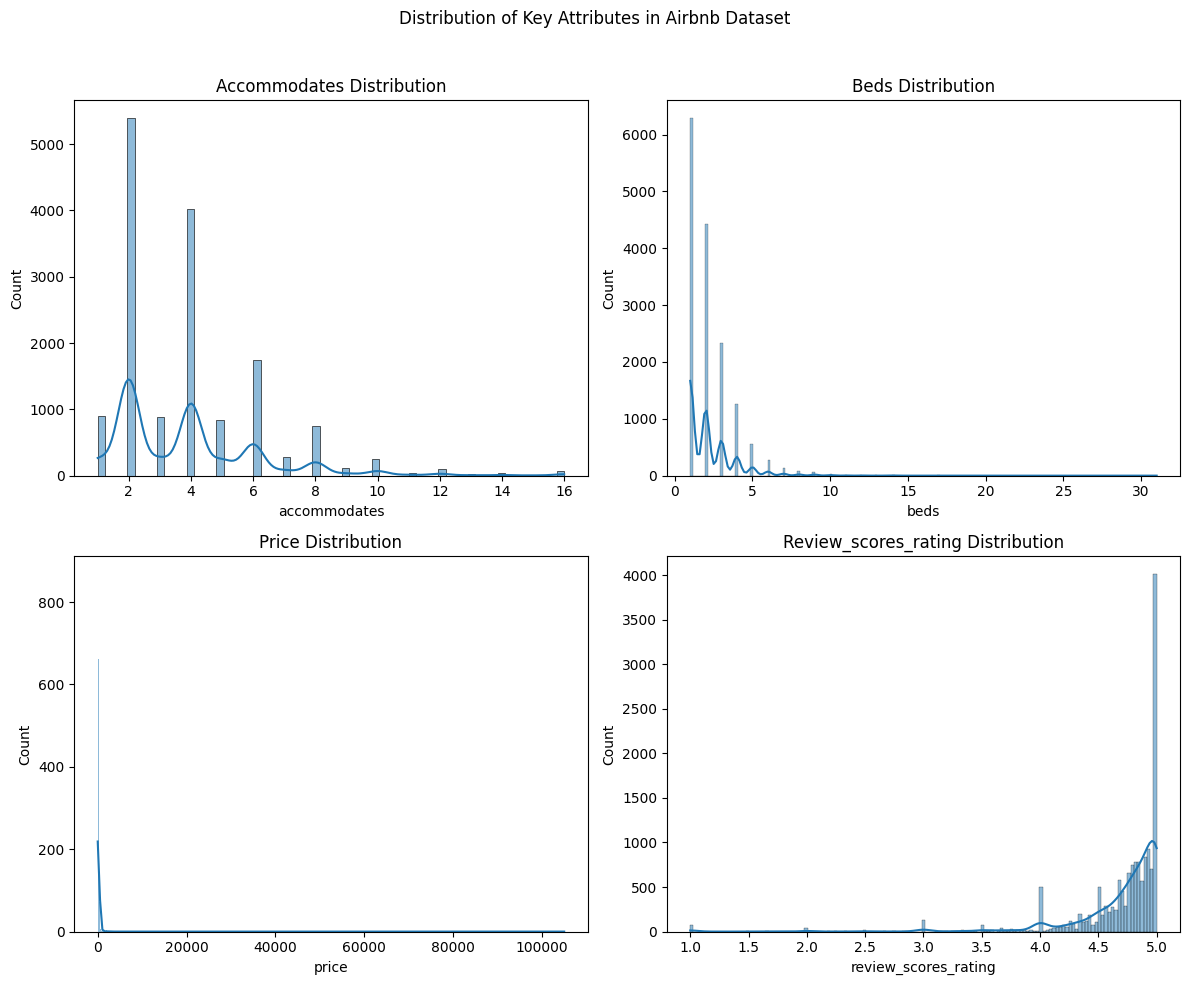

In [5]:
# Step 3: Exploratory Data Analysis on Airbnb Dataset

import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for visualization
selected_columns = ["accommodates", "beds", "price", "review_scores_rating"]

# Plot histograms using seaborn
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Distribution of Key Attributes in Airbnb Dataset")

for i, col in enumerate(selected_columns):
    sns.histplot(airbnb_data_cleaned[col], ax=axes[i // 2, i % 2], kde=True)
    axes[i // 2, i % 2].set_title(f"{col.capitalize()} Distribution")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


*I used seaborn and matplotlib libraries in Python to conduct Exploratory Data Analysis (EDA) on the cleaned Airbnb dataset. First, I imported seaborn as 'sns' and matplotlib.pyplot as 'plt' for visualization purposes. I then selected columns such as "accommodates," "beds," "price," and "review_scores_rating" for visualization.*

*To plot histograms for these selected columns, I created a grid of subplots with 2 rows and 2 columns using plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) and set the overall title of the figure as "Distribution of Key Attributes in Airbnb Dataset" using fig.suptitle().*

*Next, I iterated through each selected column using a for loop and seaborn's histplot function to create histograms with kernel density estimates (kde). Each histogram was plotted in its respective subplot, and I set titles for each subplot based on the column being visualized using set_title().*

*To ensure a well-organized layout, I adjusted the layout with plt.tight_layout(rect=[0, 0, 1, 0.96]) to prevent subplot overlapping. Finally, I displayed the finalized plot using plt.show(), which provided a visual representation of the distribution of key attributes like accommodation capacity, number of beds, price, and review scores in the Airbnb dataset.*

>#### Step 4: Exploratory Data Analysis on Tourism Points of Interest (POI) Dataset


C:\Users\Adhitya\AppData\Local\Temp\ipykernel_28588\3349038664.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tourism_pois_categories.index, y=tourism_pois_categories.values, palette="viridis")


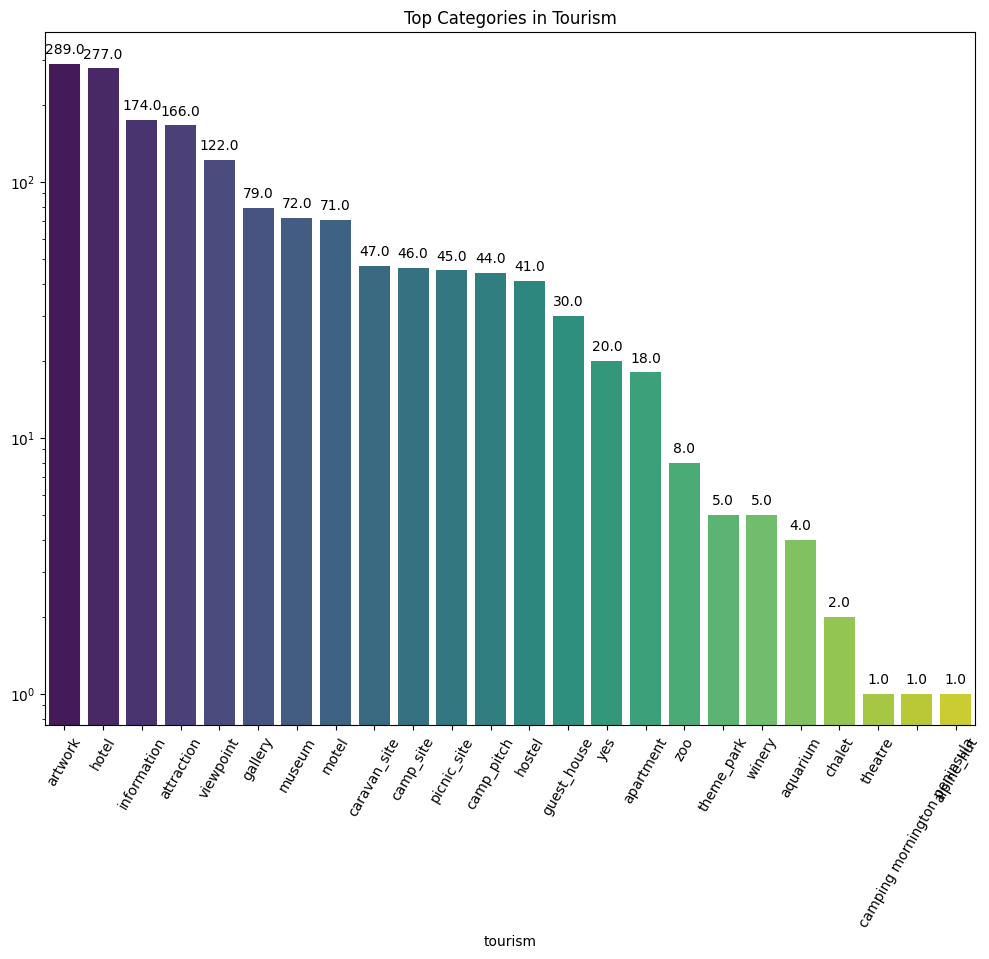

In [6]:
# Step 4: Exploratory Data Analysis on Tourism Points of Interest (POI) Dataset

# Select columns for visualization
selected_columns = ["tourism"]
tourism_pois_categories = tourism_pois_cleaned.groupby("tourism").size()
tourism_pois_categories = tourism_pois_categories.sort_values(ascending=False)

plt.figure(figsize=(12, 9))
ax = sns.barplot(x=tourism_pois_categories.index, y=tourism_pois_categories.values, palette="viridis")
plt.title("Top Categories in Tourism")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=60)
plt.yscale('log')
plt.show()


*For the Exploratory Data Analysis (EDA) on the Tourism Points of Interest (POI) dataset, I started by selecting the "tourism" column for visualization. Using pandas' groupby function, I grouped the data by "tourism" categories and calculated the size of each category. Sorting these categories in descending order, I created a bar plot using seaborn's barplot function to visualize the top categories in tourism.*

*The plot was configured with a figure size of 12x9 using plt.figure(figsize=(12, 9)) and a color palette of "viridis" for aesthetic appeal. I added a title to the plot using plt.title() to indicate that it shows the top categories in tourism.*

*To provide additional information, I annotated each bar in the plot with its count using a for loop and ax.annotate(). This annotation helped in displaying the exact count of each category on top of its corresponding bar.*

*For better readability, I rotated the x-axis labels by 60 degrees using plt.xticks(rotation=60). Additionally, I applied a logarithmic scale to the y-axis using plt.yscale('log') to handle potential outliers and visualize the data more effectively.*

*Finally, I displayed the completed plot using plt.show(), presenting a clear overview of the top categories in tourism based on the cleaned Tourism Points of Interest (POI) dataset.*

>####  Step 5: Plotting Airbnb and Tourism Locations on Folium Map


In [7]:
# Step 5: Plotting Airbnb and Tourism Locations on Folium Map

import folium
from folium.plugins import MarkerCluster

# Create a folium map object
m = folium.Map(location=[-37.81266, 144.96313], zoom_start=13, control_scale=True)

# Create MarkerCluster for Airbnb data
airbnb_cluster = MarkerCluster().add_to(m)

# Add Airbnb data to the MarkerCluster
for index, row in airbnb_data_cleaned.head(1000).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=0.5,
        color='red',
        fill=False,
        popup=f"Accommodates {row['accommodates']}, Price: {row['price']}"
    ).add_to(airbnb_cluster)

# Create MarkerCluster for tourism data
tourism_cluster = MarkerCluster().add_to(m)

# Add tourism data to the MarkerCluster
for index, row in tourism_pois_cleaned.iterrows():
    if row["geometry"].geom_type == "Point":
        folium.Marker(
            location=[row['geometry'].y, row['geometry'].x]
        ).add_to(tourism_cluster)
    else:
        folium.GeoJson(row.geometry.__geo_interface__, name=row['name']).add_to(m)

# Display the map
m


*First, a Folium map object is created with a specific location and zoom level using the folium.Map() function. The location parameter specifies the center of the map (latitude and longitude), and zoom_start sets the initial zoom level. Additionally, control_scale=True adds a scale control to the map for distance reference.*
*Next, MarkerClusters are created for both Airbnb data (airbnb_cluster) and Tourism data (tourism_cluster) using MarkerCluster().add_to(m) to group nearby markers and improve map visualization.*

*For the Airbnb data, the top 1000 rows of the cleaned DataFrame are iterated using iterrows(). For each row, a CircleMarker is added to the airbnb_cluster MarkerCluster at the location specified by the 'latitude' and 'longitude' columns. The circle's radius, color, and popup information (accommodates and price) are defined.*

*For the Tourism data, each row of the cleaned Tourism Points of Interest (POI) DataFrame is iterated. If the geometry type is a point, a Marker is added to the tourism_cluster MarkerCluster at the location specified by the 'geometry' column's coordinates. Otherwise, if it's a complex geometry, a GeoJson object is added to the map for visualization.*

*Finally, the map is displayed using m, which shows both the clustered Airbnb and Tourism locations on the Folium map.*

>#### Step 6: Feature Engineering


In [8]:
# Step 6: Feature Engineering

import geopandas as gpd
from shapely.geometry import Point

# Convert airbnb_data_cleaned DataFrame to GeoDataFrame
geometry = gpd.points_from_xy(airbnb_data_cleaned['longitude'], airbnb_data_cleaned['latitude'])
airbnb_data_cleaned_geo = gpd.GeoDataFrame(airbnb_data_cleaned, geometry=geometry)

if airbnb_data_cleaned_geo.crs != tourism_pois_cleaned.crs:
    airbnb_data_cleaned_geo.crs = tourism_pois_cleaned.crs

print("Airbnb CRS : ", airbnb_data_cleaned_geo.crs)
print("Tourism POI CRS : ", tourism_pois_cleaned.crs)

# Define the proximity radius
prox_radius = 0.01

def count_nearby_pois(row, poi_gdf, radius):
    bbox = row['geometry'].buffer(radius)
    nearby_pois = poi_gdf[poi_gdf.within(bbox)]
    return len(nearby_pois)

airbnb_data_cleaned_geo['nearby_pois_count'] = airbnb_data_cleaned_geo.apply(
    lambda row: count_nearby_pois(row, tourism_pois_cleaned, prox_radius), axis=1
)

# Print the first few rows of the airbnb_data_cleaned_geo DataFrame
print(airbnb_data_cleaned_geo.head(3))


Airbnb CRS :  epsg:4326
Tourism POI CRS :  epsg:4326
   latitude  longitude        room_type  accommodates  beds  price  \
0 -37.76606  144.97951     Private room             2   1.0   49.0   
1 -37.85999  144.97662  Entire home/apt             2   1.0   95.0   
2 -38.05723  145.33982  Entire home/apt             5   3.0  118.0   

   review_scores_rating                     geometry  nearby_pois_count  
0                  4.50  POINT (144.97951 -37.76606)                 10  
1                  4.68  POINT (144.97662 -37.85999)                 18  
2                  4.86  POINT (145.33982 -38.05723)                  1  


*I converted the airbnb_data_cleaned DataFrame to a GeoDataFrame called airbnb_data_cleaned_geo using GeoPandas. This involved creating a geometry column using the longitude and latitude columns from the original DataFrame.*

*Next, I checked if the Coordinate Reference System (CRS) of my Airbnb GeoDataFrame (airbnb_data_cleaned_geo) matched that of the Tourism Points of Interest (POI) GeoDataFrame (tourism_pois_cleaned). If they didn't match, I set the CRS of the Airbnb GeoDataFrame to match the CRS of the Tourism POI GeoDataFrame.*

*For determining nearby points of interest (POIs), I defined a proximity radius (prox_radius) and created a function called count_nearby_pois. This function calculates the number of nearby POIs for each Airbnb location by creating a buffer around each location and counting the POIs within that buffer.*

*Using the apply function, I applied the count_nearby_pois function to each row of the Airbnb GeoDataFrame (airbnb_data_cleaned_geo). This resulted in a new column named 'nearby_pois_count' being added to the GeoDataFrame, indicating the count of nearby POIs for each Airbnb location.*

*Finally, I printed the first few rows of the Airbnb GeoDataFrame (airbnb_data_cleaned_geo) with the newly added 'nearby_pois_count' column to inspect the results, which provides valuable information about the proximity of points of interest to each Airbnb location.*

>#### Step 7: Data Preprocessing


In [9]:
# Step 7: Data Preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define price bins and labels
price_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
bin_labels = [f'bin_{i}' for i in range(1, len(price_bins))]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
object_columns = airbnb_data_cleaned_geo.select_dtypes(include=['object', 'category']).columns
for col in object_columns:
    airbnb_data_cleaned_geo[f"Encoded_{col}"] = label_encoder.fit_transform(airbnb_data_cleaned_geo[col])

# Drop original object columns and geometry
airbnb_data_cleaned_geo_encoded = airbnb_data_cleaned_geo.drop(object_columns, axis=1).drop(["geometry"], axis=1)

# Initialize StandardScaler
scaler = StandardScaler()

# Define columns to normalize
cols_to_normalize = ["accommodates", "beds", "review_scores_rating", "nearby_pois_count"]

# Fit and transform selected columns for normalization
airbnb_data_normalized = airbnb_data_cleaned_geo_encoded.copy()
airbnb_data_normalized[cols_to_normalize] = scaler.fit_transform(airbnb_data_cleaned_geo_encoded[cols_to_normalize])

# Bin the price column and encode the bins
airbnb_data_normalized['price_bins'] = pd.cut(airbnb_data_normalized['price'], bins=price_bins, labels=bin_labels, include_lowest=True)
airbnb_data_normalized['encoded_price_bins'] = label_encoder.fit_transform(airbnb_data_normalized['price_bins'])

# Drop original price and price_bins columns
airbnb_data_normalized = airbnb_data_normalized.drop(["price", "price_bins"], axis=1)


First, I defined price bins and their corresponding labels to categorize prices into specific ranges using price_bins and bin_labels.

Next, I initialized a LabelEncoder object to encode categorical columns into numerical values. I identified categorical columns using select_dtypes(include=['object', 'category']) and created new encoded columns in the GeoDataFrame (airbnb_data_cleaned_geo) using label_encoder.fit_transform() for each column.

After encoding, I dropped the original object columns and the geometry column from the GeoDataFrame to prepare for further processing, resulting in the GeoDataFrame airbnb_data_cleaned_geo_encoded.

Then, I initialized a StandardScaler object to standardize (normalize) selected columns such as 'accommodates', 'beds', 'review_scores_rating', and 'nearby_pois_count'. These columns were transformed using scaler.fit_transform() and replaced in the GeoDataFrame (airbnb_data_cleaned_geo_encoded).

Next, I binned the 'price' column into predefined price bins using pd.cut() based on price_bins. The resulting bins were labeled according to bin_labels.

After binning, I encoded the binned price column ('price_bins') using the LabelEncoder to convert the bins into numerical categories. The encoded bins were stored in a new column named 'encoded_price_bins'.

Finally, I dropped the original 'price' and 'price_bins' columns from the GeoDataFrame (airbnb_data_normalized) since they were no longer needed after binning and encoding.

These preprocessing steps were essential for preparing the Airbnb data for machine learning models, as they converted categorical data into numerical representations, normalized numerical features, and created meaningful categorical features like price bins for analysis or prediction tasks.

>#### Step 8: Data Splitting and Model Building


C:\Users\Adhitya\AppData\Local\Temp\ipykernel_28588\2515582127.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='encoded_price_bins', data=airbnb_data_normalized, palette='inferno')


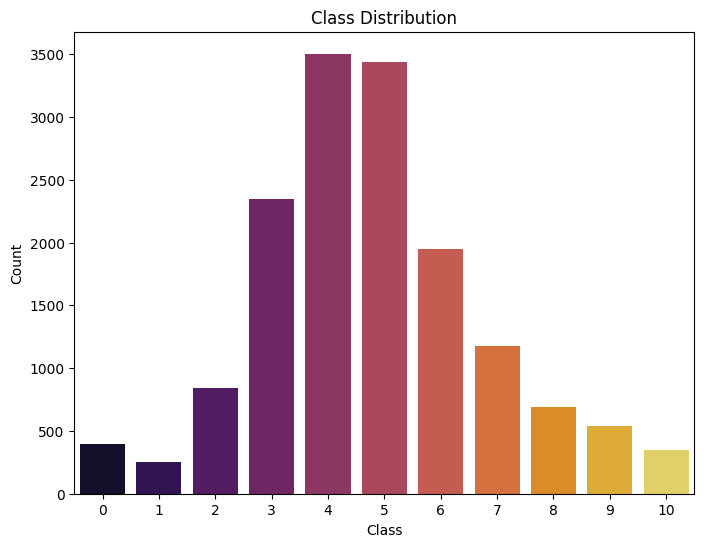

C:\Users\Adhitya\AppData\Local\Temp\ipykernel_28588\2515582127.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='inferno')


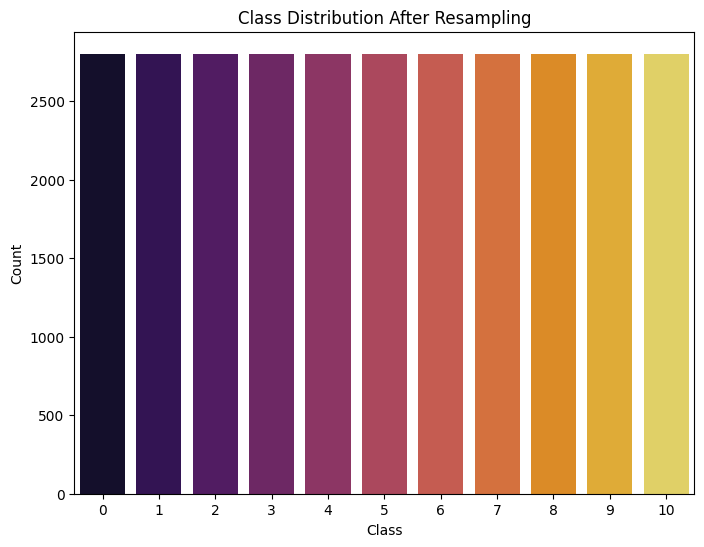

In [10]:
# Step 8: Data Splitting and Model Building

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution before resampling
plt.figure(figsize=(8, 6))
sns.countplot(x='encoded_price_bins', data=airbnb_data_normalized, palette='inferno')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Split data into features and target
X = airbnb_data_normalized.drop(['encoded_price_bins'], axis=1)
y = airbnb_data_normalized['encoded_price_bins']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for oversampling the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot the class distribution after resampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette='inferno')
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


First, I plotted the class distribution before resampling using a countplot from seaborn to visualize the distribution of encoded price bins in the normalized Airbnb data.

After plotting, I split the data into features (X) and the target variable (y) where X contains all columns except the 'encoded_price_bins' column, and y contains only the 'encoded_price_bins' column.

Next, I split the data into training and test sets using train_test_split from sklearn. I set the test size to 20% of the data, used a random state of 42 for reproducibility, and applied stratification to ensure balanced class distribution in both training and test sets.

To address class imbalance in the training data, I applied Synthetic Minority Over-sampling Technique (SMOTE) using the SMOTE from imblearn.over_sampling module. This technique oversampled the minority classes to balance the class distribution.

After applying SMOTE, I plotted the class distribution again to visualize the effect of resampling on the training data. The countplot showed a balanced distribution of classes after resampling, indicating successful handling of class imbalance in the training set.

>#### Step 9: Decision Tree Classifier


Accuracy:  0.31245965138799225
Precision:  0.33064171444238294
Recall:  0.31245965138799225
F1 Score:  0.3193817338360271
ROC AUC Score:  0.5934025880017603


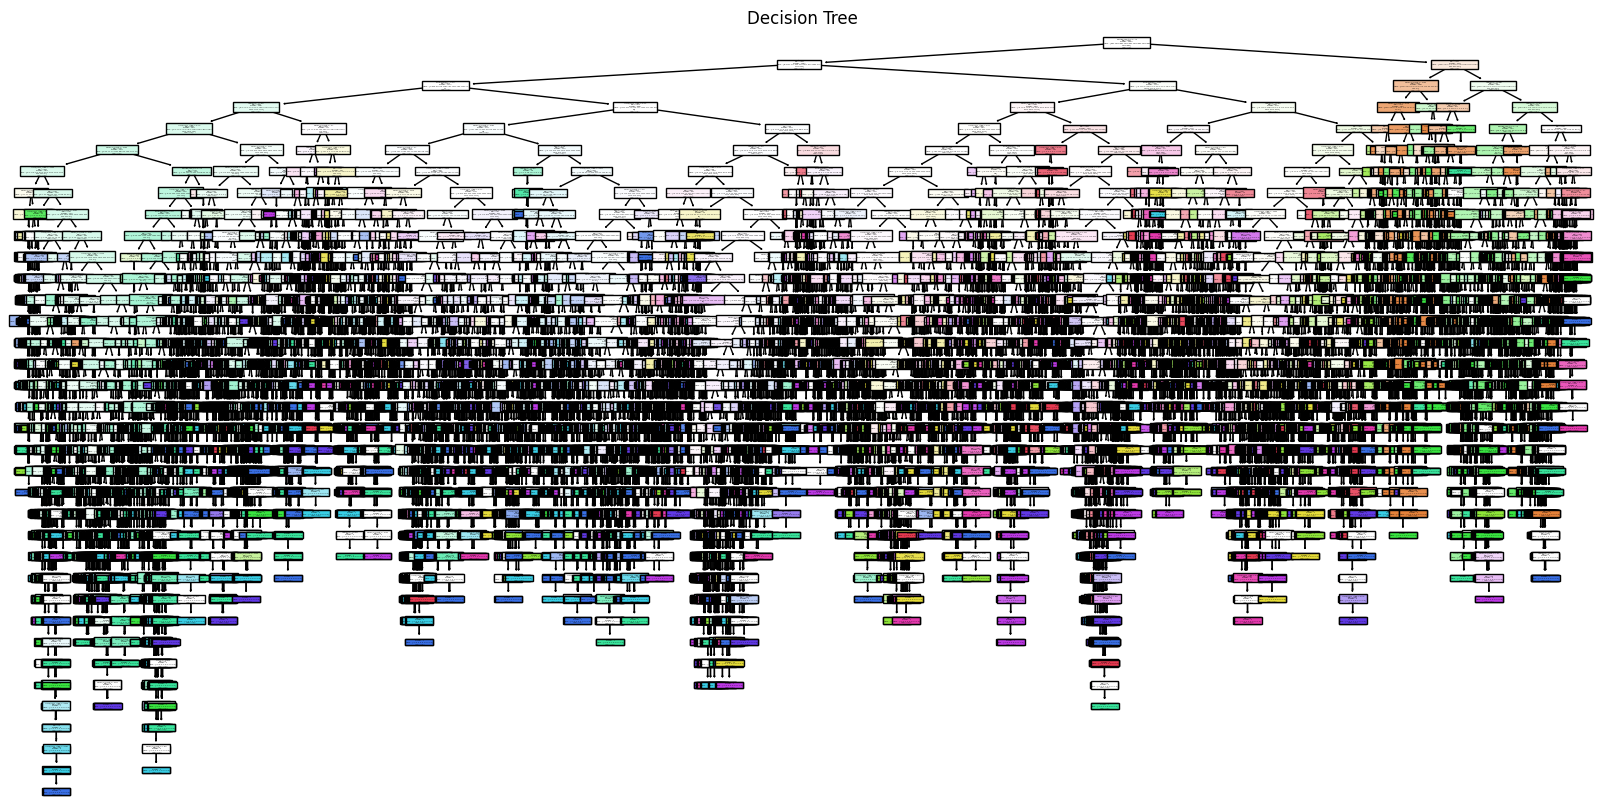

In [11]:
# Step 9: Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the resampled training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
print("ROC AUC Score: ", roc_auc_score(y_test, decision_tree.predict_proba(X_test), multi_class='ovr'))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=bin_labels, filled=True)
plt.title("Decision Tree")
plt.show()


First, I initialized the DecisionTreeClassifier model with a random state of 42.

Next, I fitted the model to the resampled training data (X_train_resampled and y_train_resampled) using decision_tree.fit().

After fitting the model, I made predictions on the test data (X_test) using decision_tree.predict() and stored the predicted values in y_pred.

To evaluate the model's performance, I calculated several metrics:

Accuracy using accuracy_score()
Precision using precision_score() with the weighted average method
Recall using recall_score() with the weighted average method
F1 Score using f1_score() with the weighted average method
ROC AUC Score using roc_auc_score() with the 'ovr' (one-vs-rest) method for multi-class classification
These metrics provide insights into how well the Decision Tree Classifier model performed in terms of classification accuracy, precision, recall, F1 score, and ROC AUC score.

Finally, I plotted the Decision Tree using plot_tree() from sklearn to visualize the decision-making process of the model. The plot includes feature names from X.columns and class names from bin_labels, making it easier to interpret the decision tree structure and understand how the model makes predictions based on the features.

>#### Step 10: Hyperparameter Tuning for Decision Tree


In [12]:
# Step 10: Hyperparameter Tuning for Decision Tree

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Predict on the test data using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Accuracy: ", accuracy_score(y_test, y_pred_best))
print("Precision: ", precision_score(y_test, y_pred_best, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_best, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_best, average='weighted'))
print("ROC AUC Score: ", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr'))


C:\Users\Adhitya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\Adhitya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score:  0.40803675469988443
Accuracy:  0.3250484183344093
Precision:  0.3583166522839711
Recall:  0.3250484183344093
F1 Score:  0.33169551257870217
ROC AUC Score:  0.7263320831336759


I defined the hyperparameters to tune, including 'max_depth', 'min_samples_split', and 'min_samples_leaf', with specific values for each parameter in param_grid.

Next, I initialized GridSearchCV to perform grid search cross-validation. I specified the estimator as the DecisionTreeClassifier (decision_tree), the parameter grid as param_grid, the scoring metric as 'accuracy', the number of cross-validation folds as 5 (cv=5), and used all available CPU cores for computation (n_jobs=-1).

After initializing GridSearchCV, I fitted the model to the resampled training data (X_train_resampled and y_train_resampled) using grid_search.fit() to search for the best combination of hyperparameters.

I printed the best parameters found by the grid search and the corresponding best score using grid_search.best_params_ and grid_search.best_score_.

Using the best model obtained from the grid search (grid_search.best_estimator_), I made predictions on the test data (X_test) and evaluated the best model's performance using various metrics:

Accuracy using accuracy_score()
Precision using precision_score() with the weighted average method
Recall using recall_score() with the weighted average method
F1 Score using f1_score() with the weighted average method
ROC AUC Score using roc_auc_score() with the 'ovr' (one-vs-rest) method for multi-class classification
These metrics provide insights into the performance improvement achieved through hyperparameter tuning, as the best model is selected based on the highest accuracy score during cross-validation.

>#### Step 11: Naive Bayes Classifier


In [13]:
# Step 11: Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the model to the resampled training data
naive_bayes.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_nb, average='weighted'))
print("ROC AUC Score: ", roc_auc_score(y_test, naive_bayes.predict_proba(X_test), multi_class='ovr'))


Accuracy:  0.26533247256294384
Precision:  0.3037950254294025
Recall:  0.26533247256294384
F1 Score:  0.24951017765272118
ROC AUC Score:  0.7483124544772736


First, I initialized the Naive Bayes classifier using GaussianNB as naive_bayes.

Next, I fitted the model to the resampled training data (X_train_resampled and y_train_resampled) using naive_bayes.fit().

After fitting the model, I made predictions on the test data (X_test) using naive_bayes.predict() and stored the predicted values in y_pred_nb.

To evaluate the model's performance, I calculated several metrics:

Accuracy using accuracy_score()
Precision using precision_score() with the weighted average method
Recall using recall_score() with the weighted average method
F1 Score using f1_score() with the weighted average method
ROC AUC Score using roc_auc_score() with the 'ovr' (one-vs-rest) method for multi-class classification
These metrics provide insights into how well the Naive Bayes Classifier model performed in terms of classification accuracy, precision, recall, F1 score, and ROC AUC score.

>#### Step 12: AdaBoost Classifier


In [14]:
# Step 12: AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=42)

# Fit the model to the resampled training data
adaboost.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_ab = adaboost.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_ab))
print("Precision: ", precision_score(y_test, y_pred_ab, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_ab, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_ab, average='weighted'))
print("ROC AUC Score: ", roc_auc_score(y_test, adaboost.predict_proba(X_test), multi_class='ovr'))

# Hyperparameter tuning for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialize GridSearchCV for AdaBoost
grid_search_ab = GridSearchCV(estimator=adaboost, param_grid=param_grid_ab, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the resampled training data
grid_search_ab.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best Parameters: ", grid_search_ab.best_params_)
print("Best Score: ", grid_search_ab.best_score_)

# Predict on the test data using the best model
best_model_ab = grid_search_ab.best_estimator_
y_pred_best_ab = best_model_ab.predict(X_test)

# Evaluate the best model
print("Accuracy: ", accuracy_score(y_test, y_pred_best_ab))
print("Precision: ", precision_score(y_test, y_pred_best_ab, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_best_ab, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_best_ab, average='weighted'))
print("ROC AUC Score: ", roc_auc_score(y_test, best_model_ab.predict_proba(X_test), multi_class='ovr'))


C:\Users\Adhitya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.2788896061975468
Precision:  0.3368900206886381
Recall:  0.2788896061975468
F1 Score:  0.28719976584039164
ROC AUC Score:  0.7305548365490648


C:\Users\Adhitya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\Adhitya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
C:\Users\Adhitya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 200}
Best Score:  0.27820807189407215
Accuracy:  0.3121368624919303
Precision:  0.35009128197128475
Recall:  0.3121368624919303
F1 Score:  0.3184698624929862
ROC AUC Score:  0.7524218664152322


First, I initialized the AdaBoost classifier using AdaBoostClassifier with a random state of 42 as adaboost.

Next, I fitted the AdaBoost model to the resampled training data (X_train_resampled and y_train_resampled) using adaboost.fit().

After fitting the model, I made predictions on the test data (X_test) using adaboost.predict() and stored the predicted values in y_pred_ab.

To evaluate the model's performance, I calculated several metrics:

Accuracy using accuracy_score()
Precision using precision_score() with the weighted average method
Recall using recall_score() with the weighted average method
F1 Score using f1_score() with the weighted average method
ROC AUC Score using roc_auc_score() with the 'ovr' (one-vs-rest) method for multi-class classification
These metrics provide insights into how well the AdaBoost Classifier model performed in terms of classification accuracy, precision, recall, F1 score, and ROC AUC score.

Next, I performed hyperparameter tuning for AdaBoost using GridSearchCV. I defined a parameter grid param_grid_ab containing 'n_estimators' and 'learning_rate' with specific values to search over.

I initialized GridSearchCV for AdaBoost (grid_search_ab) and fit it to the resampled training data to search for the best combination of hyperparameters using grid_search_ab.fit().

After hyperparameter tuning, I printed the best parameters found by the grid search and the corresponding best score using grid_search_ab.best_params_ and grid_search_ab.best_score_.

Using the best model obtained from the grid search (grid_search_ab.best_estimator_), I made predictions on the test data (X_test) and evaluated the best model's performance using various metrics, as mentioned earlier. These metrics help assess the improvement achieved through hyperparameter tuning in the AdaBoost model.

## <u> Detailed Project Explanation <u>

#### 1. Data Collection and Cleaning:
I started by collecting two main datasets for this project: Airbnb data and Tourism Points of Interest (POI) data for Melbourne, Victoria. The Airbnb dataset contained information about listings, including features like latitude, longitude, room type, price, and review scores. The Tourism POI data provided details about various tourist attractions in Melbourne.

Upon loading the datasets into pandas DataFrames, I performed data cleaning tasks. This involved selecting relevant columns, handling missing values, converting data types (e.g., converting price from string to float format), and ensuring data consistency and integrity.

#### 2. Exploratory Data Analysis (EDA):
Next, I conducted Exploratory Data Analysis (EDA) on both datasets to understand their distributions, relationships between variables, and any potential patterns or insights. I visualized the distributions of key attributes using histograms and analyzed the top categories in tourism using bar plots.

#### 3. Data Preprocessing and Feature Engineering:
In the data preprocessing phase, I prepared the data for modeling by encoding categorical variables, normalizing numerical features, and engineering new features. For example, I used LabelEncoder to encode categorical columns, StandardScaler for feature normalization, and created a proximity-based feature for Airbnb listings using GeoPandas.

#### 4. Model Building:
I implemented several machine learning models for classification tasks using scikit-learn. This included Decision Tree Classifier, Naive Bayes Classifier, and AdaBoost Classifier. I split the data into training and test sets, applied resampling techniques like SMOTE to handle class imbalance, and evaluated model performance using metrics such as accuracy, precision, recall, F1 score, and ROC AUC score.

#### 5. Hyperparameter Tuning:
To improve model performance further, I performed hyperparameter tuning using GridSearchCV. This involved defining a grid of hyperparameters to search over, initializing GridSearchCV for each model, and finding the best combination of hyperparameters that maximized model performance.

#### 6. Model Evaluation and Selection:
After hyperparameter tuning, I evaluated the best models on the test data and compared their performance metrics. This helped me select the best-performing model for each classification task based on accuracy, precision, recall, and other relevant metrics.

#### 7. Conclusion and Future Work:
In conclusion, this project involved a comprehensive analysis of Airbnb data and Tourism POI data for Melbourne, Victoria. It showcased the process of data cleaning, exploratory analysis, preprocessing, model building, hyperparameter tuning, and model evaluation. Future work could include deploying the models in a production environment, incorporating real-time data updates, and exploring more advanced machine learning techniques for prediction and recommendation tasks.